### Visualizing Credit Score Distribution

The distribution of credit scores often follows a normal distribution, which can be visualized using a histogram. This visualization helps in understanding the general spread of credit scores among individuals, centered around a mean with variations expressed in terms of standard deviations.

- **Mean (μ)**: The average credit score around which the distribution centers.
- **Standard Deviation (σ)**: A measure of the spread of the scores around the mean. One standard deviation encompasses about 68% of all scores in a normal distribution, two standard deviations encompass about 95%, and three standard deviations encompass about 99.7%.

Below is a plot showing the distribution of credit scores, with lines indicating the mean and the standard deviations:


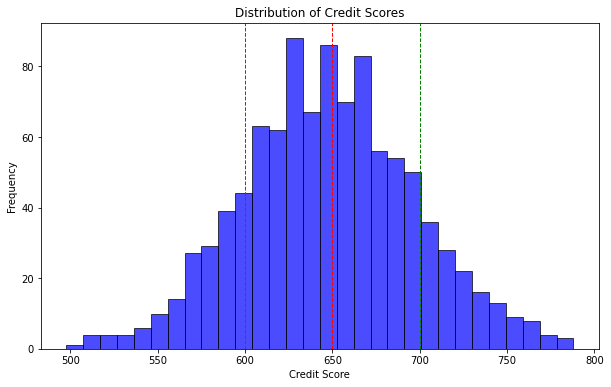

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Typical parameters for a credit score distribution
mean = 650
std_dev = 50

# Generate a sample of 1000 credit scores
np.random.seed(0)
credit_scores = np.random.normal(mean, std_dev, 1000)

# Plot the distribution of credit scores
plt.figure(figsize=(10, 6))
plt.hist(credit_scores, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

### Calculating Probability of Higher Credit Scores

To determine the quality of credit scores, banks often calculate the probability of scores exceeding a certain threshold. This probability assists in decision-making processes, such as approving credit applications or assigning interest rates.

In this case, we calculate the probability of a credit score being greater than 700. This threshold often differentiates 'good' credit from 'excellent' credit, which is crucial for financial products like low-interest loans or premium credit cards.

In [2]:
# Probability of a score greater than 700
prob_above_700 = 1 - norm.cdf(700, mean, std_dev)
print(f"Probability of a credit score > 700: {prob_above_700:.2%}")

Probability of a credit score > 700: 15.87%


### Identifying Outliers in Credit Scores

Outliers in credit scores are scores that are significantly higher or lower than the typical range. Identifying these outliers is crucial for detecting potential errors in data collection or fraudulent activity.

Outliers are usually defined as scores that lie more than three standard deviations from the mean. These are the scores that are extremely rare and could indicate underlying issues that need further investigation.

In [3]:
# Outlier thresholds
lower_bound = mean - 3*std_dev
upper_bound = mean + 3*std_dev

print(f"Credit score outliers are below {lower_bound} or above {upper_bound}.")

Credit score outliers are below 500 or above 800.


### Categorizing Credit Scores by Risk

Banks and financial institutions categorize credit scores into different risk categories to streamline the decision-making process. These categories help in assessing the level of risk associated with loaning money to an individual.

- **Low Risk**: Scores significantly higher than the mean, indicating a good history of creditworthiness.
- **High Risk**: Scores significantly lower than the mean, indicating a poor credit history and a higher chance of defaulting on loans.

Below, we define what scores fall into 'low risk' and 'high risk' categories based on their deviation from the mean:


In [4]:
# Risk categories based on standard deviations
low_risk_upper = mean + std_dev
high_risk_lower = mean - 2*std_dev

print(f"Low risk credit scores are above {low_risk_upper}.")
print(f"High risk credit scores are below {high_risk_lower}.")

Low risk credit scores are above 700.
High risk credit scores are below 550.


## Other Similar Practical Use Cases of Normal Distribution in Data Science

1. Quality Control in Manufacturing
Overview:
In manufacturing, the dimensions, concentrations, or resistances of products can vary due to imperfections in production processes. These variations usually follow a normal distribution, making it a fundamental tool for quality control.

Use Case Description:
A factory produces resistors labeled as 100 ohms, but due to unavoidable variations, the actual resistances of these resistors are normally distributed around a mean of 100 ohms with a standard deviation of 5 ohms.

Goal:
Calculate the probability that a randomly selected resistor has a resistance between 95 and 105 ohms to ensure it meets the specified quality standards.

In [5]:
import scipy.stats as stats

# Define the mean and standard deviation
mu = 100  # mean
sigma = 5  # standard deviation

# Calculate the probability of resistance between 95 and 105
p_95_105 = stats.norm(mu, sigma).cdf(105) - stats.norm(mu, sigma).cdf(95)
print(f"Probability that a resistor is between 95 and 105 ohms: {p_95_105:.4f}")

Probability that a resistor is between 95 and 105 ohms: 0.6827


### Algorithm Performance and Benchmarking
**Overview:**
Performance metrics of algorithms, especially in high-frequency trading and software operations, generally exhibit normal variability due to differing system loads and input sizes.

**Use Case Description:**
Suppose an algorithm’s execution time is normally distributed with a mean of 200 milliseconds and a standard deviation of 10 milliseconds, reflecting the common variances in processing times under normal operations.

**Goal:**
Determine the probability that the execution time is less than 220 milliseconds to assess algorithm efficiency under typical operating conditions.

In [6]:
import scipy.stats as stats

# Define the mean and standard deviation
mu = 200  # mean in milliseconds
sigma = 10  # standard deviation in milliseconds

# Calculate the probability that execution time is less than 220 milliseconds
p_less_than_220 = stats.norm(mu, sigma).cdf(220)
print(f"Probability that execution time is less than 220 ms: {p_less_than_220:.4f}")

Probability that execution time is less than 220 ms: 0.9772


### Anomaly Detection in Network Traffic
**Overview:**
Normal distributions are pivotal in network management for anomaly detection, where they help in identifying data points that significantly deviate from established norms, possibly indicating cyber threats or system failures.

**Use Case Description:**
Network traffic to a server, in terms of requests per minute, is normally distributed with a mean of 300 requests and a standard deviation of 50 requests.

**Goal:**
Evaluate whether 400 requests in a minute is an outlier, suggesting a potential issue such as a DDoS attack or a fault in network configuration.

In [7]:
import scipy.stats as stats

# Define the mean and standard deviation
mu = 300  # mean requests per minute
sigma = 50  # standard deviation

# Determine the Z-score for 400 requests/minute
z_score = (400 - mu) / sigma
print(f"Z-score for 400 requests/minute: {z_score:.2f}")

# Calculate the probability of 400 or more requests/minute (upper tail)
p_400_plus = 1 - stats.norm(mu, sigma).cdf(400)
print(f"Probability of 400 or more requests/minute: {p_400_plus:.4f}")

# Check if it is an outlier (commonly if Z-score is greater than 2 or less than -2)
is_outlier = abs(z_score) > 2
print(f"Is 400 requests/minute an outlier? {'Yes' if is_outlier else 'No'}")

Z-score for 400 requests/minute: 2.00
Probability of 400 or more requests/minute: 0.0228
Is 400 requests/minute an outlier? No
